**ESAME 24-01-2023**

In [1]:
#Import the useful packages
import pandas as pd 
import numpy as np 
import scipy
import seaborn as sns 
import matplotlib.pyplot as plt
from fitter import Fitter

**Phase 1: preliminary analysis on the dataset**

In [2]:
#Read the dataset 
df = pd.read_csv("GERD_SCIENCE_17012023090805122.csv")

In [3]:
#Quick info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70477 entries, 0 to 70476
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SECTOR                 70477 non-null  object 
 1   Sector of Performance  70477 non-null  object 
 2   SCIENCE                70477 non-null  object 
 3   Field of Sciences      70477 non-null  object 
 4   UNITS_EXP              70477 non-null  object 
 5   Measure                70477 non-null  object 
 6   COU                    70477 non-null  object 
 7   Country                70477 non-null  object 
 8   YEAR                   70477 non-null  int64  
 9   Year                   70477 non-null  int64  
 10  Unit Code              70477 non-null  object 
 11  Unit                   70477 non-null  object 
 12  PowerCode Code         70477 non-null  int64  
 13  PowerCode              70477 non-null  object 
 14  Reference Period Code  23462 non-null  float64
 15  Re

In [4]:
#Show the first ten rows of the dataset
df.head(10)

,SECTOR,Sector of Performance,SCIENCE,Field of Sciences,UNITS_EXP,Measure,COU,Country,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1981,1981,AUD,Australian Dollar,6,Millions,NaN,NaN,396.6,c,National estimate or projection
1,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1983,1983,AUD,Australian Dollar,6,Millions,NaN,NaN,506.8,c,National estimate or projection
2,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1984,1984,AUD,Australian Dollar,6,Millions,NaN,NaN,721.3,c,National estimate or projection
3,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1985,1985,AUD,Australian Dollar,6,Millions,NaN,NaN,947.9,c,National estimate or projection
4,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1986,1986,AUD,Australian Dollar,6,Millions,NaN,NaN,1280.1,NaN,NaN
5,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1987,1987,AUD,Australian Dollar,6,Millions,NaN,NaN,1455.7,NaN,NaN
6,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1988,1988,AUD,Australian Dollar,6,Millions,NaN,NaN,1798.3,NaN,NaN
7,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1989,1989,AUD,Australian Dollar,6,Millions,NaN,NaN,1989.7,NaN,NaN
8,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1990,1990,AUD,Australian Dollar,6,Millions,NaN,NaN,2099.8,NaN,NaN
9,BE,Business enterprise,TOTAL_S,All fields of science,NC6,National Currency,AUS,Australia,1991,1991,AUD,Australian Dollar,6,Millions,NaN,NaN,2364.6,NaN,NaN


*For the purposes of the investigation we take into consideration a subset of the full dataset (data in USD units).*

In [5]:
df["Unit Code"].unique()

array(['AUD', 'USD', 'EUR', 'CAD', 'CZK', 'DKK', 'HUF', 'ISK', 'JPY',
       'KRW', 'MXN', 'NZD', 'NOK', 'PLN', 'SEK', 'CHF', 'TRY', 'GBP',
       'ARS', 'CLP', 'CNY', 'ILS', 'RON', 'RUB', 'SGD', 'ZAR', 'TWD'],
      dtype=object)

In [6]:
#Take the subset of USD-values
df_USD = df[df["Unit Code"] == 'USD']
df_USD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47173 entries, 30 to 70476
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SECTOR                 47173 non-null  object 
 1   Sector of Performance  47173 non-null  object 
 2   SCIENCE                47173 non-null  object 
 3   Field of Sciences      47173 non-null  object 
 4   UNITS_EXP              47173 non-null  object 
 5   Measure                47173 non-null  object 
 6   COU                    47173 non-null  object 
 7   Country                47173 non-null  object 
 8   YEAR                   47173 non-null  int64  
 9   Year                   47173 non-null  int64  
 10  Unit Code              47173 non-null  object 
 11  Unit                   47173 non-null  object 
 12  PowerCode Code         47173 non-null  int64  
 13  PowerCode              47173 non-null  object 
 14  Reference Period Code  23462 non-null  float64
 15  Refere

In [7]:
#Remove from the dataframe the rows which contain NaN as 'Value'
df_USD = df_USD.dropna(subset=['Value'])

Text(0.5, 1.0, 'USD-values boxplot distribution from 1981 until 2015')

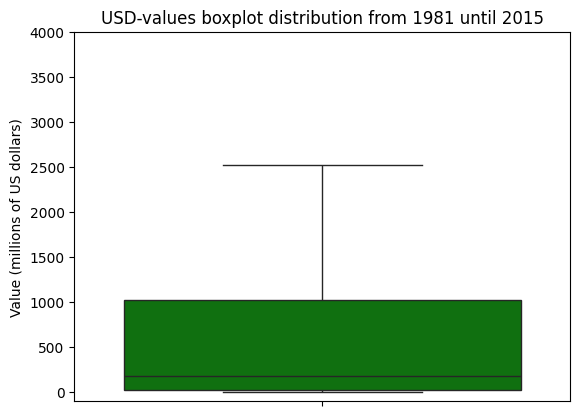

In [8]:
#Boxplot distribution of the values
ax = sns.boxplot(data=df_USD, y="Value", fliersize=0, color='green')
ax.set_ylim([-100, 4000])
ax.set_ylabel("Value (millions of US dollars)")
ax.set_title("USD-values boxplot distribution from 1981 until 2015")

**Fig.1: Boxplot distribution of all the values with outliers turned off. The values on the y-axis are measured in millions of US dollars.**

*The plot above shows the full boxplot distribution of the values. We can see that 50% of the values are included in the range (0,1000).*

Text(0.5, 1.0, 'USD-values histplot distribution from 1981 until 2015')

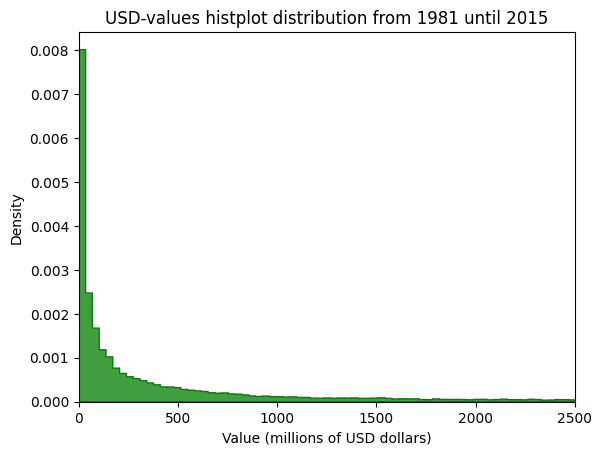

In [9]:
#Histplot distribution of the values
g = sns.histplot(data=df_USD, x="Value", bins=10000,
                 stat="density", kde=False, color='green',
                 cumulative=False, common_norm=False, element="step") 
g.set_xlim([0, 2500])
g.set_xlabel("Value (millions of USD dollars)")
g.set_title("USD-values histplot distribution from 1981 until 2015")

**Fig.2: Histplot distribution of all the values. For the sake of readibility, the limits on the x-axis are between 0 and 2500, since 75% of values are included in this range (see boxplot in Fig.1).**

Text(0.5, 1.0, 'USD-values histplot distribution per sector')

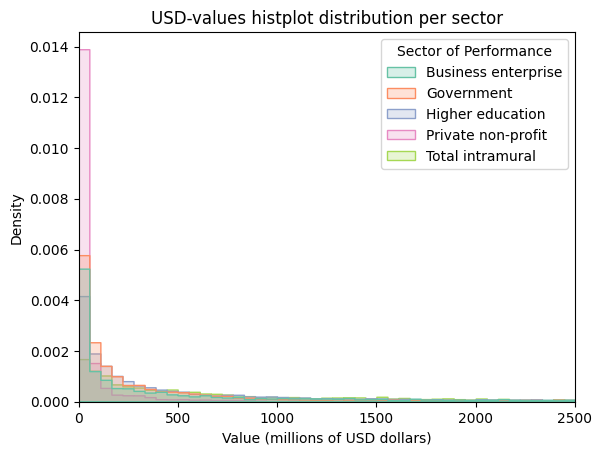

In [10]:
#Histplot distribution for the values divided by sector of performance
g = sns.histplot(data=df_USD, x="Value", hue="Sector of Performance", 
                 stat="density", kde=False, palette="Set2",
                 cumulative=False, common_norm=False, element="step") 
g.set_xlim([0, 2500])
g.set_xlabel("Value (millions of USD dollars)")
g.set_title("USD-values histplot distribution per sector")

/tmp/ipykernel_4379/2117549330.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'Business enterprise'),
 Text(1, 0, 'Government'),
 Text(2, 0, 'Higher education'),
 Text(3, 0, 'Private non-profit'),
 Text(4, 0, 'Total intramural')]

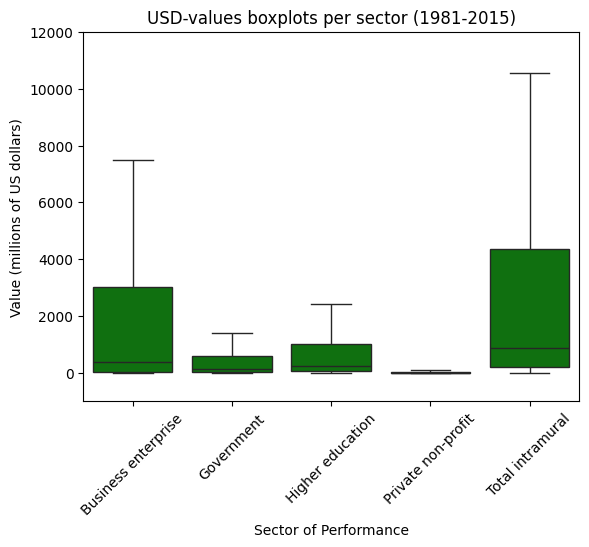

In [12]:
#Boxplot distributions per sector
ax = sns.boxplot(data=df_USD, x="Sector of Performance", y="Value", color='green', fliersize=0)
ax.set_ylim([-1000, 12000])
ax.set_ylabel("Value (millions of US dollars)")
ax.set_title("USD-values boxplots per sector (1981-2015)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)